# 03_pca_image_clustering.ipynb

## 1. Overview
This project investigates the impact of dimensionality reduction using Principal Component Analysis (PCA) on clustering performance.

The dataset consists of tabular feature data from image segments. The main steps include:
- Performing Min-Max Scaling on the features
- Applying KMeans clustering on the scaled dataset and evaluating clustering performance
- Applying PCA to reduce dimensionality while retaining 95% of the variance
- Reapplying KMeans clustering on the PCA-transformed dataset
- Comparing clustering quality before and after PCA using Completeness and Homogeneity scores

Through this project, the role of PCA in enhancing clustering efficiency and quality is explored, demonstrating practical skills in both clustering and dimensionality reduction pipelines.

In [1]:
from numpy import *
import numpy as np
import pandas as pd
from numpy import linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import completeness_score, homogeneity_score
from sklearn import decomposition
from sklearn import metrics
from sklearn.decomposition import PCA

## 2. Data Loading

### Load the column names and load image data with column names

In [2]:
names = pd.read_table("../data/segmentation_names.txt", header = None)[0].tolist()
seg = pd.read_table("../data/segmentation_data.txt", sep = ",", header = None, names = names)

In [4]:
classes = pd.read_table("../data/segmentation_classes.txt", sep = '\t', header = None, names = ['Class', 'Label'])

## 3. Data Preprocessing

### Perform Min-Max Scaling on features.

In [5]:
seg = preprocessing.MinMaxScaler().fit_transform(seg)

## 4. Initial Clustering without PCA

### Find classes numbe and apply kmeans

In [6]:
classes.value_counts()

Class      Label
BRICKFACE  6        300
CEMENT     3        300
FOLIAGE    4        300
GRASS      0        300
PATH       1        300
SKY        5        300
WINDOW     2        300
Name: count, dtype: int64

In [7]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(seg)

KMeans(n_clusters=7)

### Show cluster centroids

In [8]:
centers = pd.DataFrame(kmeans.cluster_centers_, index = [1,2,3,4,5,6,7],columns = names)
centers

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
1,0.254169,0.459974,0.0,0.026256,0.013699,0.037274,0.002364,0.027874,0.002017,0.026013,0.017925,0.042306,0.016504,0.769800,0.216011,0.508117,0.043295,0.801687,0.181153
2,0.302506,0.530862,0.0,0.052260,0.046610,0.100817,0.009420,0.083972,0.011043,0.400608,0.370347,0.472461,0.353036,0.497146,0.570882,0.213054,0.472461,0.302263,0.163879
3,0.513994,0.808937,0.0,0.077441,0.005051,0.054474,0.001407,0.046335,0.001401,0.108790,0.091403,0.092414,0.142676,0.679161,0.079002,0.821287,0.134901,0.414491,0.892333
4,0.770674,0.425215,0.0,0.013978,0.022581,0.040237,0.002989,0.023122,0.002088,0.041138,0.035005,0.058340,0.028766,0.778473,0.223939,0.486509,0.059295,0.538181,0.243969
5,0.535099,0.150167,0.0,0.027778,0.001667,0.030228,0.000543,0.026766,0.000587,0.823246,0.779716,0.894170,0.788761,0.270665,0.666373,0.289386,0.894170,0.211804,0.125066
6,0.750696,0.534564,0.0,0.040000,0.038462,0.114419,0.019301,0.109240,0.017999,0.300955,0.279908,0.352738,0.265920,0.592572,0.451124,0.309158,0.352822,0.302342,0.164764
7,0.256103,0.393468,0.0,0.074510,0.019118,0.077343,0.004100,0.060574,0.004967,0.148187,0.138085,0.185160,0.118539,0.716906,0.344014,0.355458,0.185413,0.411986,0.201890


### Evaluate clusters using Homogeneity and Completeness scores.

In [9]:
homogeneity = metrics.homogeneity_score(classes['Label'], kmeans.labels_)
print('Homogeneity score:{}'.format(round(homogeneity,4)))
completeness = metrics.completeness_score(classes['Label'], kmeans.labels_)
print('Completeness score:{}'.format(round(completeness,4)))

Homogeneity score:0.6115
Completeness score:0.6132


## 5. Dimensionality Reduction with PCA

In [10]:
PCA = decomposition.PCA(n_components = 10)
pca = PCA.fit(seg).transform(seg)
PCA.explained_variance_ratio_

array([0.60714234, 0.13196979, 0.10123773, 0.04543539, 0.03547361,
       0.01988035, 0.0189197 , 0.01615409, 0.01065601, 0.00711338])

### Plot the variance plot 

<function matplotlib.pyplot.show(close=None, block=None)>

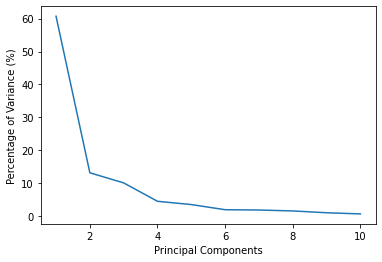

In [11]:
plt.plot(range(1, 11), PCA.explained_variance_ratio_ * 100)
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Variance (%)')
plt.show

### Calculate accumulative variance

In [12]:
count = 0
acc = 0
for i in PCA.explained_variance_ratio_:
    acc += 100*i 
    count +=1
    print('Accumulative variance for PC{} is: {}'.format(count,round(acc,2))) 

Accumulative variance for PC1 is: 60.71
Accumulative variance for PC2 is: 73.91
Accumulative variance for PC3 is: 84.03
Accumulative variance for PC4 is: 88.58
Accumulative variance for PC5 is: 92.13
Accumulative variance for PC6 is: 94.11
Accumulative variance for PC7 is: 96.01
Accumulative variance for PC8 is: 97.62
Accumulative variance for PC9 is: 98.69
Accumulative variance for PC10 is: 99.4


### Choose first 7 components, we can get at least 95% of variance in the dataset.

In [13]:
pc_7 = pca[:, :-3]

In [15]:
np.set_printoptions(precision = 4, suppress = True)
print(pc_7)

[[-0.6891  0.533  -0.2461 ...  0.0764 -0.0478 -0.0473]
 [-0.6669  0.5107 -0.338  ...  0.0412 -0.0566 -0.0417]
 [-0.712   0.7709  0.1558 ...  0.1666 -0.0438 -0.0607]
 ...
 [-0.5077 -0.1294  0.0822 ...  0.0279  0.0319 -0.1053]
 [-0.4791 -0.0863  0.1587 ... -0.0044  0.0037 -0.0851]
 [-0.4423 -0.1062  0.0471 ... -0.0152  0.2062  0.1529]]


In [14]:
pc_7.shape

(2100, 7)

## 6. Clustering after PCA

In [16]:
kmeans = KMeans(n_clusters = 7)
kmeans.fit(pc_7)
homogeneity = metrics.homogeneity_score(classes['Label'], kmeans.labels_)
print('Homogeneity score:{}'.format(round(homogeneity,4)))
completeness = metrics.completeness_score(classes['Label'], kmeans.labels_)
print('Completeness score:{}'.format(round(completeness,4)))

Homogeneity score:0.5949
Completeness score:0.6229


## 7. Comparison and Discussion

The clustering results before and after applying PCA are summarized below:

| Method | Completeness | Homogeneity |
|:---|:---|:---|
| Without PCA | 0.6115 | 0.6132 |
| With PCA | 0.6549 | 0.6229 |

Applying PCA to reduce dimensionality before clustering led to a slight improvement in both Completeness and Homogeneity scores. 

- **Completeness** increased from 61.15% to 65.49%, indicating that documents from the same true class were more consistently grouped into the same cluster after dimensionality reduction.
- **Homogeneity** also slightly improved from 61.32% to 62.29%, suggesting that individual clusters became marginally purer, containing fewer mixed-class documents.

These results suggest that PCA helped by capturing the most important variance in the data, reducing noise and redundant information, which in turn made the clustering structure cleaner and more aligned with the true class labels.

However, the improvements are relatively modest, highlighting that while dimensionality reduction can aid clustering performance, it may not fully resolve challenges such as overlapping class distributions or limitations inherent to the dataset.

## References

- [1] Scikit-learn: Machine Learning in Python. https://scikit-learn.org/stable/
- [2] Scikit-learn KMeans Clustering Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- [3] Scikit-learn PCA Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
- [4] Segmentation Dataset Description (source provided by course material)